In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
fraud_data = pd.read_csv('Fraud_Data.csv')
fraud_data.head()

user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0  
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0

In [74]:
ip_address_data = pd.read_csv('IpAddress_to_Country.csv')
ip_address_data.head()

lower_bound_ip_address  upper_bound_ip_address    country
0              16777216.0                16777471  Australia
1              16777472.0                16777727      China
2              16777728.0                16778239      China
3              16778240.0                16779263  Australia
4              16779264.0                16781311      China

In [75]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
user_id           151112 non-null int64
signup_time       151112 non-null object
purchase_time     151112 non-null object
purchase_value    151112 non-null int64
device_id         151112 non-null object
source            151112 non-null object
browser           151112 non-null object
sex               151112 non-null object
age               151112 non-null int64
ip_address        151112 non-null float64
class             151112 non-null int64
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [76]:
fraud_data['source'].value_counts()

SEO       60615
Ads       59881
Direct    30616
Name: source, dtype: int64

In [77]:
sns.heatmap(fraud_data.isnull(),  yticklabels = False, cbar = False, cmap="Blues")

In [78]:
ip_address_data.info()
# ip_address_data.country.value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
lower_bound_ip_address    138846 non-null float64
upper_bound_ip_address    138846 non-null int64
country                   138846 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [79]:
plt.figure(figsize=(20,10))
sns.countplot(data = fraud_data, x = 'age', hue="class")

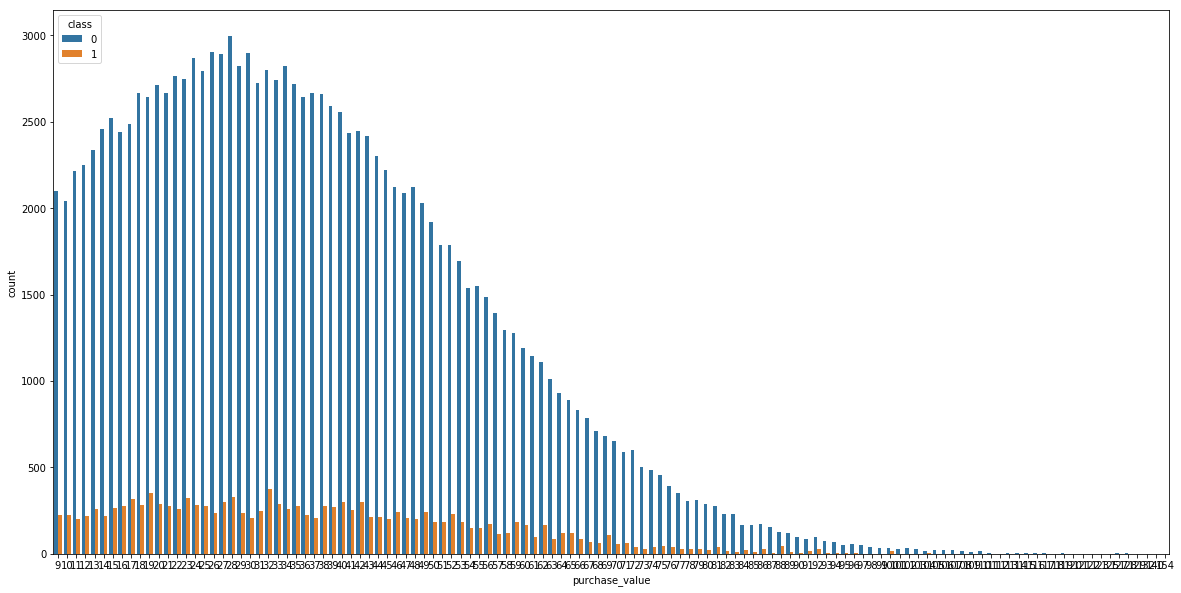

In [80]:
plt.figure(figsize=(20,10))
sns.countplot(data = fraud_data, x = 'purchase_value', hue="class")

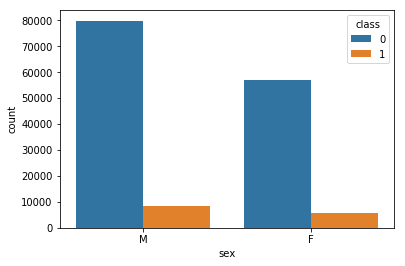

In [81]:
sns.countplot(data = fraud_data, x = 'sex', hue="class")

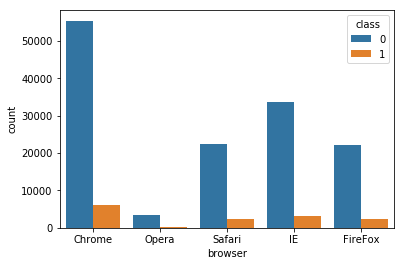

In [82]:
sns.countplot(data = fraud_data, x = 'browser', hue="class")

In [86]:
# X = fraud_data.drop(['user_id', 'signup_time', 'purchase_time','device_id'], axis=1, inplace=True)
X = fraud_data.drop(['user_id', 'signup_time', 'purchase_time','device_id', 'class', 'ip_address'],axis=1)

In [92]:
sex = pd.get_dummies(X['sex'], drop_first=True)
X['sex'] = sex
X

purchase_value  source  browser  sex  age
0                   34     SEO   Chrome    1   39
1                   16     Ads   Chrome    0   53
2                   15     SEO    Opera    1   53
3                   44     SEO   Safari    1   41
4                   39     Ads   Safari    1   45
5                   42     Ads   Chrome    1   18
6                   11     Ads   Chrome    0   19
7                   27     Ads    Opera    1   34
8                   30     SEO       IE    0   43
9                   62     Ads       IE    1   31
10                  13     Ads   Safari    0   35
11                  58  Direct   Chrome    1   32
12                  18     SEO   Safari    1   33
13                  50  Direct   Safari    1   38
14                  15     SEO       IE    1   24
15                  58     SEO   Safari    0   24
16                  57     SEO  FireFox    1   23
17                  55     Ads   Safari    1   38
18                  40     Ads  FireFox    1   24
19                  46  Direct  FireFox    0   53
20                  24  Direct  FireFox    0   23
21                  47     SEO   Chrome    1   28
22                  47     SEO   Chrome    0   24
23                  25     Ads       IE    1   34
24                  52  Direct       IE    0   35
25                  31     SEO  FireFox    1   36
26                  37     Ads       IE    1   32
27                  54     SEO   Chrome    0   28
28                  12     SEO       IE    1   19
29                  48     SEO   Chrome    0   27
...                ...     ...      ...  ...  ...
151082              90     SEO       IE    1   34
151083              15     Ads       IE    1   37
151084              52     SEO   Chrome    1   44
151085              47     SEO   Chrome    1   21
151086              63     SEO   Safari    0   36
151087              21     Ads   Safari    0   21
151088              18     SEO   Chrome    1   30
151089              43     SEO       IE    1   34
151090              29     Ads   Chrome    0   38
151091              26  Direct   Safari    0   22
151092              50     SEO  FireFox    1   32
151093              38     SEO   Chrome    1   31
151094              34     SEO   Safari    0   30
151095              41     SEO  FireFox    0   23
151096              43  Direct    Opera    0   30
151097              16     SEO   Chrome    0   28
151098              55     Ads   Chrome    0   49
151099              61  Direct       IE    1   24
151100              48     SEO  FireFox    0   31
151101              63     SEO   Safari    1   46
151102              41     SEO   Chrome    1   26
151103              27  Direct   Chrome    1   39
151104              20     Ads       IE    0   39
151105              23     Ads  FireFox    1   18
151106              13     SEO   Safari    0   42
151107              43     SEO   Chrome    1   28
151108              35     SEO   Safari    1   32
151109              40     SEO       IE    0   26
151110              46     SEO   Chrome    1   37
151111              20  Direct       IE    1   38

[151112 rows x 5 columns]